# Generalizing an AgglomerativeClustering model with KMeans
- The objective of this notebook is to __apply a method of generalization to an AgglomerativeClustering / HierarchicalClustering model__.
- This is made by creating an array that contains the mean values of every feature from each cluster created by the AgglomerativeClustering model, in order to pass initialization centroids to a KMeans model.
- The used dataset presents a series of __characteristics of apartments of an unknown city__.
- In order to have a better view of the geographical distribution of these apartments, __only the latitude and longitude features will be used__. 
#### - Since the agglomerative or hierarchical clustering method creates a dendrogram for that specific set of data, it is not generalizable on its own. Therefore, we can make use of the following technique to generalize it for future data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

## Reading the data

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Indexing 

In [3]:
df.loc[:, 'date'] = pd.to_datetime(df['date'])
df = df.set_index(['id', 'date'])
df

,,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,date,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


For the sake of this model, we're going to **use only the geographical coordinates to group our apartments**. This way we'll be able to make a demarcation that is somewhat **similar to the city's neighbourhoods**.

In [4]:
X = df[['lat', 'long']]
X

,,lat,long
id,date,,
7129300520,2014-10-13,47.5112,-122.257
6414100192,2014-12-09,47.7210,-122.319
5631500400,2015-02-25,47.7379,-122.233
2487200875,2014-12-09,47.5208,-122.393
1954400510,2015-02-18,47.6168,-122.045
...,...,...,...
263000018,2014-05-21,47.6993,-122.346
6600060120,2015-02-23,47.5107,-122.362
1523300141,2014-06-23,47.5944,-122.299


## Plotting (part of) our dendrogram

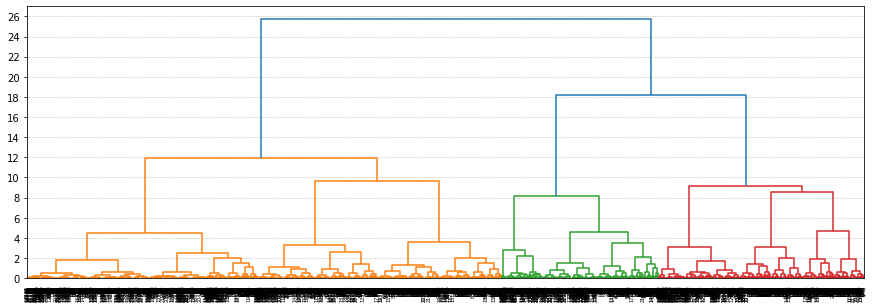

In [5]:
plt.figure(figsize=(15, 5))
Z = sch.linkage(X, method='ward')
sch.dendrogram(Z, p=11, truncate_mode='level')

plt.yticks(range(0, 27, 2))
plt.grid(linestyle=':', axis='y')

We've **limited the dendrogram** in order **to optimize the run time** of the code as we still maintain the most important part of our visualization. This visualization enables us to **make a good decision on the number of clusters and the distance threshold** for our dataset.

## Training our model

In [6]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(
            n_clusters=None,
            distance_threshold=3,
            linkage='ward')

X_clust = X.copy()
clusts = agg.fit_predict(X)
X_clust.loc[:, 'cluster'] = clusts

X_clust.cluster.value_counts(normalize=False)

1     2324
11    2317
4     2250
2     1948
10    1627
3     1584
8     1432
15    1378
7     1165
5     1150
6     1142
12    1007
13     745
9      661
0      635
14     248
Name: cluster, dtype: int64

In order to **maintain a reasonable amount of neighbourhoods** in this city, we've **decided that the distance_threshold parameter should be 3**, giving us a good partition of our data.

## Visualizing the physical distribution of our clusters

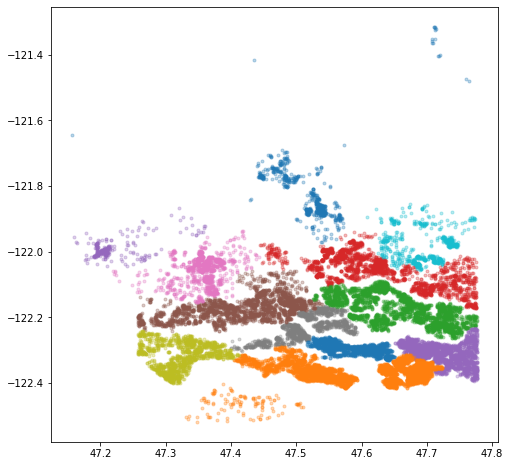

In [7]:
plt.figure(figsize=(8, 8))
for clust in np.sort(X_clust.cluster.unique()):
    plt.plot(X_clust.loc[X_clust.cluster==clust].lat, X_clust.loc[X_clust.cluster==clust].long, '.', alpha=.3)

We can see that the clusters are well divided in the space.
- Note that, since matplotlib has only 10 colors on its pallette, there are reocurring colors.

## Stablishing the initial centroids for our KMeans 

As said before, we're going to **generalize our AgglomerativeClustering model using a KMeans method**. This implies that we'll **use the centroids** (determined by the mean latitude and longitude values of each cluster) **to initialize our KMeans model**.

In [8]:
coords = []
for cl in np.sort(X_clust.cluster.unique()):
    coord = []
    lat_media = X_clust.loc[X_clust.cluster==cl].lat.mean()
    long_media = X_clust.loc[X_clust.cluster==cl].long.mean()
    print(f'Cluster {cl} - lat {lat_media:.2f} | long {long_media:.2f}')
    coord.append(lat_media)
    coord.append(long_media)
    coords.append(coord)
coorde = np.array(coords)
coorde

Cluster 0 - lat 47.52 | long -121.82
Cluster 1 - lat 47.51 | long -122.37
Cluster 2 - lat 47.69 | long -122.20
Cluster 3 - lat 47.58 | long -122.03
Cluster 4 - lat 47.72 | long -122.31
Cluster 5 - lat 47.35 | long -122.19
Cluster 6 - lat 47.36 | long -122.06
Cluster 7 - lat 47.52 | long -122.23
Cluster 8 - lat 47.32 | long -122.32
Cluster 9 - lat 47.70 | long -121.98
Cluster 10 - lat 47.59 | long -122.29
Cluster 11 - lat 47.67 | long -122.37
Cluster 12 - lat 47.59 | long -122.13
Cluster 13 - lat 47.73 | long -122.11
Cluster 14 - lat 47.22 | long -121.99
Cluster 15 - lat 47.47 | long -122.16


array([[  47.51801795, -121.8194063 ],
       [  47.51374561, -122.36712866],
       [  47.69085236, -122.19841427],
       [  47.57962443, -122.03218182],
       [  47.72388533, -122.31042756],
       [  47.35110713, -122.19024174],
       [  47.35787364, -122.05880298],
       [  47.51559185, -122.22927811],
       [  47.32456599, -122.31853073],
       [  47.69512829, -121.98416793],
       [  47.58640418, -122.29454395],
       [  47.67155451, -122.36529348],
       [  47.59156931, -122.13185899],
       [  47.73057289, -122.1053745 ],
       [  47.22167419, -121.9896371 ],
       [  47.46912917, -122.15633454]])

These are the **mean values of latitude and longitude from each cluster**. With those we can **determine where the centroids of each created cluster would be**. These points were put in the array "coorde", that will be passed as the initialization array for the subsequent KMeans method.
- This should speed up the run time of the KMeans.
- The "optimization" of these centroids shouldn't change a lot from what was initally given.

In [9]:
coorde.shape

(16, 2)

In [10]:
X_s = X.copy()
X_s

,,lat,long
id,date,,
7129300520,2014-10-13,47.5112,-122.257
6414100192,2014-12-09,47.7210,-122.319
5631500400,2015-02-25,47.7379,-122.233
2487200875,2014-12-09,47.5208,-122.393
1954400510,2015-02-18,47.6168,-122.045
...,...,...,...
263000018,2014-05-21,47.6993,-122.346
6600060120,2015-02-23,47.5107,-122.362
1523300141,2014-06-23,47.5944,-122.299


## Training the KMeans model

Note that:
- The number of clusters passed was the same as found on the HierarchicalClustering method.
- The "coorde" array was passed as an initialization parameter.

In [11]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=16, init=coorde, max_iter=3000)
km.fit(X_s)

C:\Users\rafaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[  47.51801795, -121.8194063 ],
       [  47.51374561, -122.36712866],
       [  47.69085236, -122.19841427],
       [  47.57962443, -122.03218182],
       [  47.72388533, -122.31042756],
       [  47.35110713, -122.19024174],
       [  47.35787364, -122.05880298],
       [  47.51559185, -122.22927811],
       [  47.32456599, -122.31853073],
       [  47.69512829, -121.98416793],
       [  47.58640418, -122.29454395],
       [  47.67155451, -122.36529348],
       [  47.59156931, -122.13185899],
       [  47.73057289, -122.1053745 ],
       [  47.22167419, -121.9896371 ],
       [  47.46912917, -122.15633454]]),
       max_iter=3000, n_clusters=16)

In [12]:
X_s_clust = X_s.copy()
X_s_clust.loc[:, 'cluster'] = km.predict(X_s)
X_s_clust

,,lat,long,cluster
id,date,,,
7129300520,2014-10-13,47.5112,-122.257,7
6414100192,2014-12-09,47.7210,-122.319,4
5631500400,2015-02-25,47.7379,-122.233,2
2487200875,2014-12-09,47.5208,-122.393,1
1954400510,2015-02-18,47.6168,-122.045,3
...,...,...,...,...
263000018,2014-05-21,47.6993,-122.346,11
6600060120,2015-02-23,47.5107,-122.362,1
1523300141,2014-06-23,47.5944,-122.299,10


Text(0.5, 1.0, 'O - KMeans | * - AggClustering')

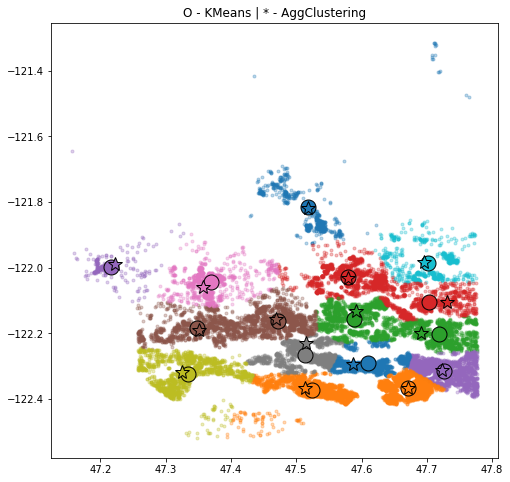

In [13]:
plt.figure(figsize=(8, 8))
for clust in np.sort(X_s_clust.cluster.unique()):
    plt.plot(X_s_clust.loc[X_s_clust.cluster==clust].lat, X_s_clust.loc[X_s_clust.cluster==clust].long, '.', alpha=.3)

for num, (x, y) in enumerate(km.cluster_centers_):
    plt.plot(x, y, 'o', color=f'C{num}', ms=15, mec='k', label='KMeans')

for num, (x, y) in enumerate(coorde):
    plt.plot(x, y, '*', color=f'C{num}', ms=15, mec='k', label='AggClustering')

plt.title('O - KMeans | * - AggClustering')

The above graph allows us to see the optimization of the clusters' centroids and the comparison between the two models. The star (*) represents the initial clustering from the Hierarchical model and the circle (O) represents the centroids found by the KMeans method.

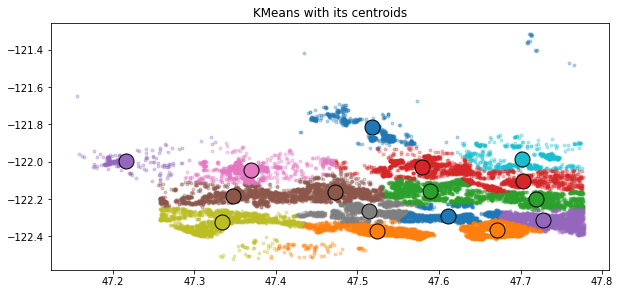

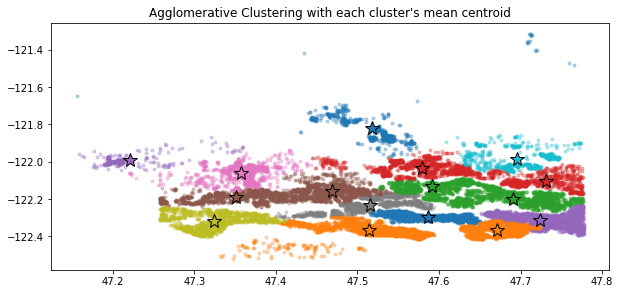

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.title('KMeans with its centroids')
for clust in np.sort(X_s_clust.cluster.unique()):
    plt.plot(X_s_clust.loc[X_s_clust.cluster==clust].lat, X_s_clust.loc[X_s_clust.cluster==clust].long, '.', alpha=.3)

for num, (x, y) in enumerate(km.cluster_centers_):
    plt.plot(x, y, 'o', color=f'C{num}', ms=15, mec='k')

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 2)
plt.title("Agglomerative Clustering with each cluster's mean centroid")
for clust in np.sort(X_clust.cluster.unique()):
    plt.plot(X_clust.loc[X_clust.cluster==clust].lat, X_clust.loc[X_clust.cluster==clust].long, '.', alpha=.3)
for num, (x, y) in enumerate(coorde):
    plt.plot(x, y, '*', color=f'C{num}', ms=15, mec='k')

## Visualizing the geographical distribution of each cluster (validation)

### KMeans model

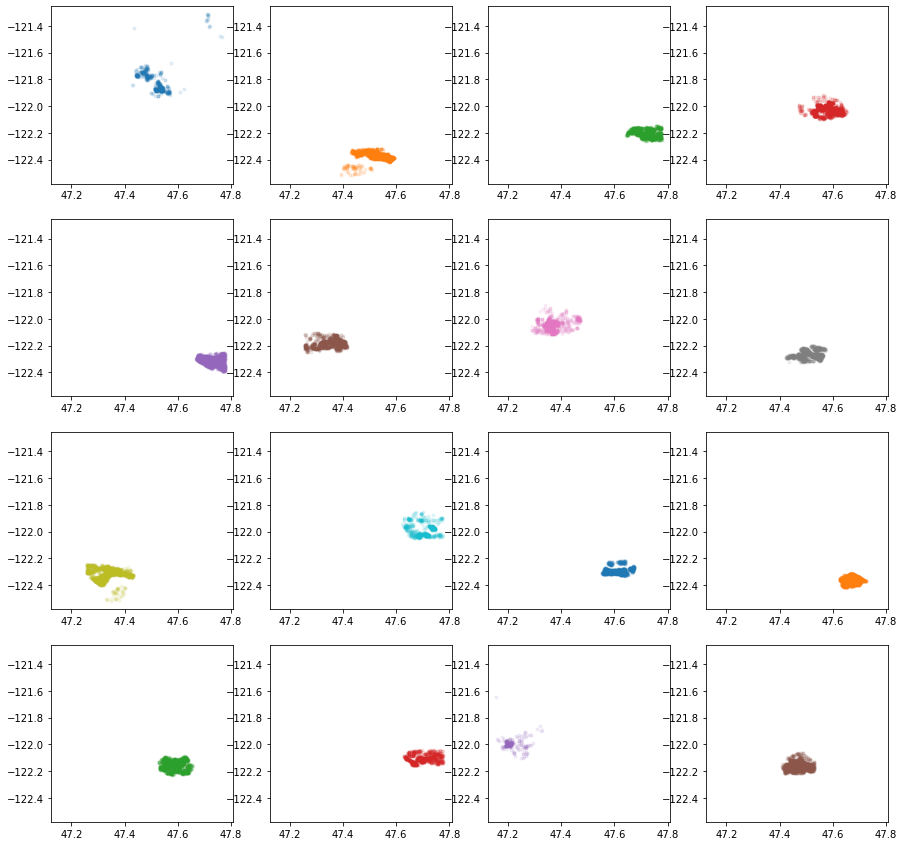

In [15]:
plt.figure(figsize=(15,3*5))
for num,clus in enumerate(np.sort(X_s_clust.cluster.unique())):
    if num == 0:
        ax = plt.subplot(4, 4,num+1)
    else:
        plt.subplot(4, 4,num+1,sharex=ax,sharey=ax)
    X_ = X_s_clust.loc[X_s_clust.cluster==clus].copy()
    plt.plot(X_.lat, X_.long, '.', color=f'C{num}', alpha=.1);

### Agglomerative Clustering model

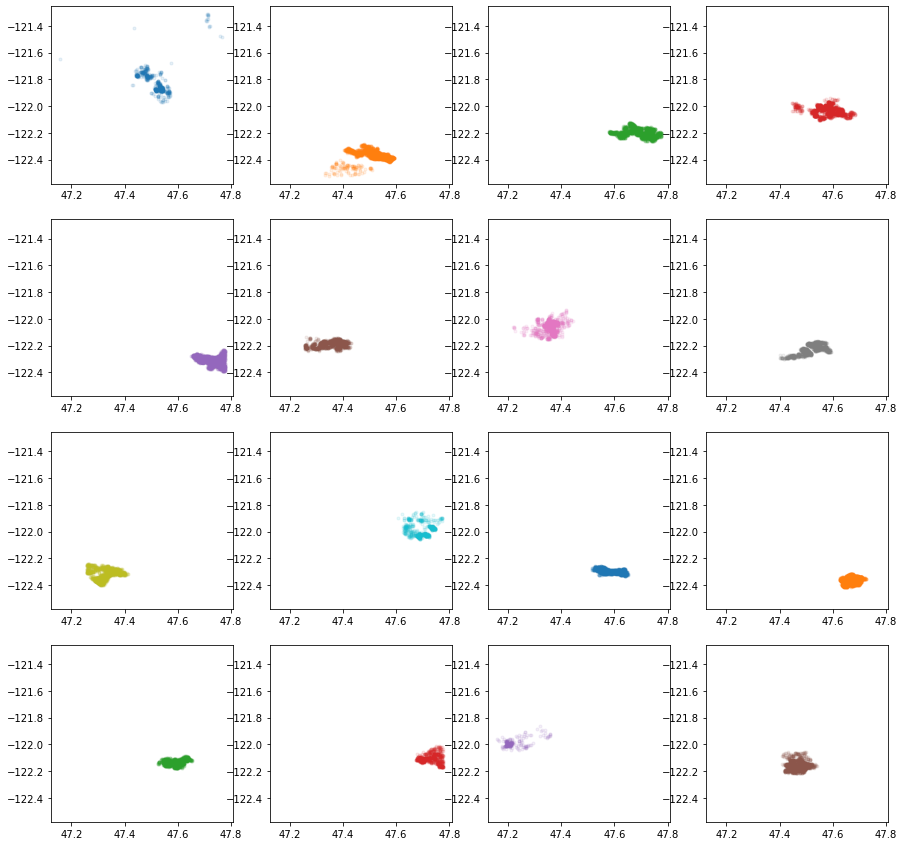

In [16]:
plt.figure(figsize=(15,3*5))
for num,clus in enumerate(np.sort(X_clust.cluster.unique())):
    if num == 0:
        ax = plt.subplot(4, 4,num+1)
    else:
        plt.subplot(4, 4,num+1,sharex=ax,sharey=ax)
    X_ = X_clust.loc[X_clust.cluster==clus].copy()
    plt.plot(X_.lat, X_.long, '.', color=f'C{num}', alpha=.1);

#### For better visualization we can also compare the distribution of our apartments for each cluster, regarding both models:

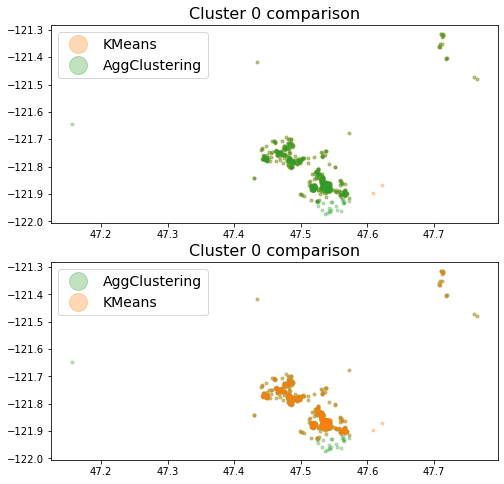

In [17]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(X_s_clust.loc[X_s_clust.cluster==0].lat, X_s_clust.loc[X_s_clust.cluster==0].long, '.', alpha=.3, color='C1', label='KMeans')
plt.plot(X_clust.loc[X_clust.cluster==0].lat, X_clust.loc[X_clust.cluster==0].long, '.', alpha=.3, color='C2', label='AggClustering')
plt.title('Cluster 0 comparison', fontsize=16)
plt.legend(fontsize=14, markerscale=6)

plt.subplot(2, 1, 2)
plt.plot(X_clust.loc[X_clust.cluster==0].lat, X_clust.loc[X_clust.cluster==0].long, '.', alpha=.3, color='C2', label='AggClustering')
plt.plot(X_s_clust.loc[X_s_clust.cluster==0].lat, X_s_clust.loc[X_s_clust.cluster==0].long, '.', alpha=.3, color='C1', label='KMeans')
plt.title('Cluster 0 comparison', fontsize=16)
plt.legend(fontsize=14, markerscale=6)

Above we can see that the cluster 0 is extremely similar for both models. We could check the individual differences for each cluster, but this is enough to demonstrate the resemblance of the clustering methods.
- The graph was plotted twice for better visualization, since matplotlib overlaps the first set of plotted dots with the one that comes last on the code.

Below, we can see the **difference of the median and two quartiles (5% and 95%) between both methods** for each cluster.
- This is particularly useful to observe whether there is a major difference between one or more clusters. Basically, we can **see whether or not the generalization was consistent throughout all groups**.

In [18]:
def q05(grp):
    return grp.quantile(0.05)
def q95(grp):
    return grp.quantile(0.95)

(X_s_clust.groupby('cluster').agg([q05,'median',q95]))-(X_clust.groupby('cluster').agg([q05,'median',q95]))

lat                        long                 
              q05   median       q95      q05  median      q95
cluster                                                       
0       -0.000005 -0.00065  0.000205  0.00830  0.0020  0.00005
1        0.025370  0.00600  0.001215  0.00685 -0.0040 -0.01400
2        0.057025  0.02475  0.016400 -0.00300  0.0000 -0.01400
3        0.044125 -0.00045 -0.015740  0.00600  0.0030  0.00600
4        0.008955  0.00165 -0.000255  0.00255 -0.0035 -0.00400
5       -0.000525 -0.00410 -0.007200 -0.00045  0.0030  0.02945
6        0.007060  0.00195  0.056400  0.02795  0.0100  0.01300
7        0.007500  0.00310 -0.019380 -0.02420 -0.0420 -0.04400
8        0.002265  0.00685  0.031335 -0.00600 -0.0050 -0.00500
9        0.004635  0.00850  0.013185  0.00000 -0.0010 -0.00100
10       0.032460  0.02270  0.027530  0.00000 -0.0010  0.03200
11       0.000000 -0.00060 -0.002320  0.00000 -0.0010  0.00200
12      -0.004165 -0.00400 -0.001500 -0.04230 -0.0260 -0.00500
13      -0.044600 -0.03270 -0.007060  0.01600  0.0000 -0.01380
14      -0.001730  0.00015 -0.058955 -0.03790 -0.0030 -0.00855
15      -0.003155  0.00400  0.008750  0.00000 -0.0060 -0.01875

With these informations we can confirm that our **clusters are somewhat consistent between both models**. The **biggest difference seen was of** 0.05 degrees (°), which corresponds **roughly** to **5 km**. Not only that, but the median value remained extremely close between both models, which is great.

This value can be accepted depending on the city that was used for this dataset. For the range of latitudes and longitudes seen in this problem, **we can assume that this data refers to a big city, therefore this difference is acceptable**.